In [14]:
import ds
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.colors import ListedColormap
import math

df = pd.read_csv("Cleaned_DF.csv")

In [15]:
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [17]:
features = ['CryoSleep','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Deck','Num','Side','route']

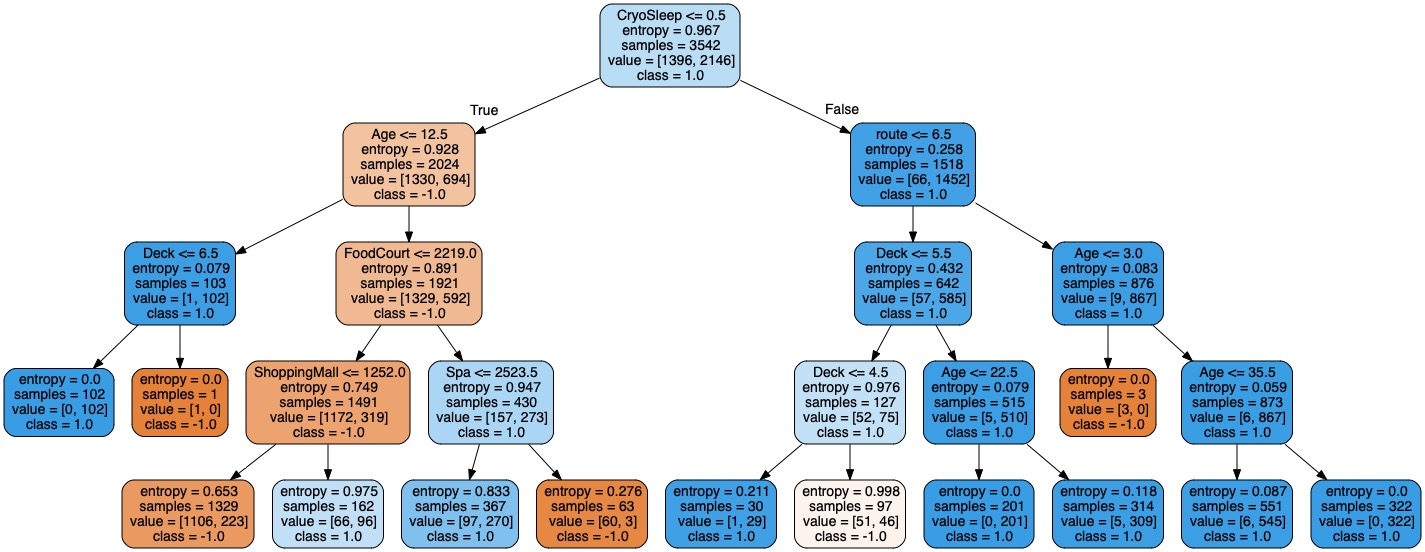

test size:  3542 , total errors in test: 12.62%
index = predicted, columns = factual, in %:
         -1        1
-1   34.472  7.67928
 1  4.94071   52.908


In [5]:
data_exploration_tree = ds.divide_frame(dataf = df[df['route']>3.5],columns = features,teacher_column = "Transported",classifier = 'Tree', criterion_tree = "entropy", depth = 4, random_state_sample = 5,random_state_ppn = 2, fraction = 1)

3.5 < route

1519 CryoSleep == 1 ==> 1.0 [66,1453]

In [18]:
pd.value_counts(df[(df['route']>3.5)&(df['CryoSleep']==1.0)]["Transported"])

 1.0    1452
-1.0      66
Name: Transported, dtype: int64

In [6]:
mask = (df['CryoSleep'] == 0)&(df['route']>3.5)

In [7]:
df_rest = df[mask]

In [8]:
df_rest.drop("CryoSleep", axis = 1, inplace = True)

/Users/sergey/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [9]:
df_rest.shape

(2024, 12)

In [10]:
df_rest

,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,route
0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,2.0,0.0,1.0,8.0
2,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,-1.0,1.0,0.0,2.0,8.0
3,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,-1.0,1.0,0.0,2.0,8.0
11,45.0,0.0,39.0,7295.0,589.0,110.0,124.0,1.0,2.0,1.0,1.0,7.0
12,32.0,0.0,73.0,0.0,1123.0,0.0,113.0,1.0,6.0,1.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7667,32.0,0.0,1.0,1146.0,0.0,50.0,34.0,-1.0,1.0,97.0,1.0,8.0
7668,30.0,0.0,0.0,3208.0,0.0,2.0,330.0,1.0,1.0,97.0,1.0,8.0
7669,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,-1.0,1.0,98.0,1.0,7.0
7672,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,-1.0,5.0,608.0,2.0,7.0


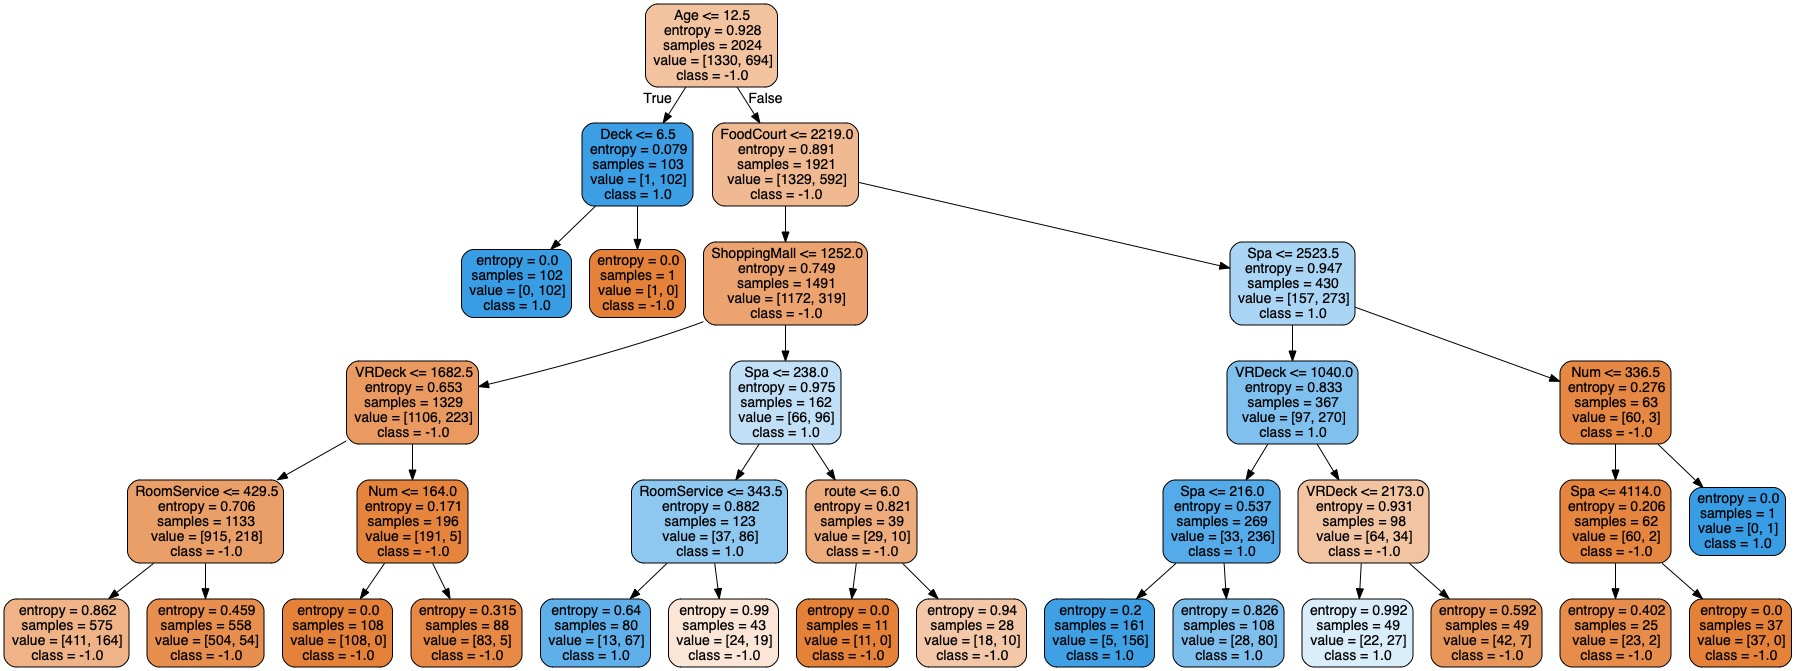

test size:  2024 , total errors in test: 16.25%
index = predicted, columns = factual, in %:
         -1        1
-1  62.3518  12.8953
 1  3.35968  21.3933


In [11]:
features = ['Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Deck','Num','Side','route']
tree = ds.divide_frame(dataf = df_rest,columns = features,teacher_column = "Transported",classifier = 'Tree', criterion_tree = "entropy", depth = 5, random_state_sample = 5,random_state_ppn = 2, fraction = 1)

route > 3.5 & age <= 12.5 & CryoSleep == 0 ==> 1 [1,102]

In [19]:
mask1 = (df['CryoSleep'] == 0)&(df['route']>3.5)&(df['Age']>12.5)
features = ['Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Deck','Num','Side','route']
df_rest1 = df[mask1][features+["Transported"]]
df_rest1.shape

(1921, 12)

In [20]:
df_rest.describe()

,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,route
count,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.00000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000
mean,32.892292,0.076581,544.906621,1454.923419,379.346344,859.776186,830.75000,-0.314229,3.913043,365.182806,1.504941,6.347332
std,13.779539,0.265991,1041.196007,2895.517480,1044.346068,1996.091334,1973.65138,0.949582,1.673659,433.104856,0.500099,1.424110
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-1.000000,1.000000,0.000000,1.000000,4.000000
25%,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-1.000000,3.000000,91.000000,1.000000,5.000000
50%,32.000000,0.000000,20.500000,76.500000,4.000000,40.500000,14.00000,-1.000000,4.000000,202.500000,2.000000,7.000000
75%,41.000000,0.000000,771.500000,1647.000000,336.000000,715.250000,636.25000,1.000000,6.000000,423.250000,2.000000,8.000000
max,79.000000,1.000000,9920.000000,29813.000000,23492.000000,22408.000000,20336.00000,1.000000,8.000000,1892.000000,2.000000,9.000000
